# Detection of IoT Threats with Deep Learning

Syed Badruddoja, Justin Hicks, Keith Santamaria

## Importing libraries

In [7]:
#Running default example as per assignment
from __future__ import absolute_import, division, print_function, unicode_literals

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn import svm, metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import csv
import time


print(tf.__version__)



1.14.0


## Importing and Preprocessing of data.

This Notebook assumes you have the dataset locally stored in the same location as the notebook.

If using Google Collab you can upload those files by clicking the folder icon on the left column and then clicking upload. 

Location of the dataset we used is in this github : https://github.com/JJHicks/IoT-Botnet-Attack-Detection

In [8]:
#Reading Training Data
training_data_import=pd.read_csv('train_data.csv')
training_target_import=pd.read_csv('train_target.csv')

train_data_as_numpy = training_data_import.to_numpy()
train_target_as_numpy = training_target_import.to_numpy()
train_target_flattened = train_target_as_numpy.flatten()

#preprocessing data for normalization
scaler = preprocessing.StandardScaler().fit(train_data_as_numpy)
train_data_transformed = scaler.transform(train_data_as_numpy)

train_data=train_data_transformed
train_target=train_target_flattened
print("train_data shape: ",train_data.shape)
print("train_target shape: ",train_target.shape)


train_data shape:  (82331, 41)
train_target shape:  (82331,)


In [9]:
#Reading Testing Data
testing_data_import=pd.read_csv('test_data.csv')
testing_target_import=pd.read_csv('test_target.csv')


#converting data to numpy array
test_data_as_numpy = testing_data_import.to_numpy()
test_target_as_numpy = testing_target_import.to_numpy()
test_target_flattened = test_target_as_numpy.flatten()

#preprocessing data for normalization
scaler = preprocessing.StandardScaler().fit(test_data_as_numpy)
test_data_transformed = scaler.transform(test_data_as_numpy)

test_data=test_data_transformed
test_target=test_target_flattened
print("test_data shape: ",test_data.shape)
print("test_target shape: ",test_target.shape)

test_data shape:  (81172, 41)
test_target shape:  (81172,)


## Defining our experiment workflow

So for our experiments we wil be doing the following for each model:

* Define and compile the model

* Determine the best number of epochs by running the model with 100 epochs and seeing where it starts to overfit.

* Recompile model and then generate learning curve with optimal # of epochs

* Generate a confusion matrix

Once this is done for each model we will compare the models by using the confusion matrix to determine overall accuracy and the recall per category 



In [10]:
def gen_learning_curve(model,max_epoch, train_data, test_data, train_target, test_target):
    training_accuracy_per_epoch = []
    testing_accuracy_per_epoch = []
    for i in range(1,max_epoch+1):
        print("Iteration ",i)
        train=model.fit(train_data, train_target, epochs=1)
        test_loss, test_acc = model.evaluate(test_data,  test_target, verbose=2)
        training_accuracy_per_epoch .append(train.history['acc'][-1])
        testing_accuracy_per_epoch.append(test_acc)
    return training_accuracy_per_epoch, testing_accuracy_per_epoch

def gen_plot_range(max_range):
    x= []
    for i in range(1,max_range+1):
        x.append(i)
    return x

def gen_learning_curve_image(max_epoch, train_accuracy,test_accuracy, dimension_x, dimension_y):
    x = gen_plot_range(max_epoch)
    #Setting x-labels
    plt.figure(figsize=(dimension_x, dimension_y))
    #Plotting the two different lines
    plt.plot(x,train_accuracy,marker='o',color='b')
    plt.plot(x,test_accuracy,marker='v',color='r')
    #Putting a title and labels
    plt.title("Learning curve over training time")
    plt.ylabel("Value of accuracy")
    plt.xlabel("Epoch number")
    plt.legend(['Test Accuracy','Train Accuracy'],loc = 'lower right')
    plt.xticks(x)
    plt.show()

def gen_cf(model,test_dataset,test_target):
    predictions_probabilities = model.predict(test_dataset)
    predictions= predictions_probabilities.argmax(axis=1)
    model_confusion_matrix=confusion_matrix(test_target,predictions)
    return model_confusion_matrix

def gen_cf_image(matrix):
    df_cm= pd.DataFrame(matrix, range(10), range(10))
    sn.set(font_scale=1.4) # for label size
    fig, ax = plt.subplots(figsize=(20,10))  
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 20},ax=ax,fmt='g') # font size
    plt.show()

def optimal_epoch_search(model, train_data, test_data, train_target, test_target):
    temp_train_accuracy, temp_test_accuracy = gen_learning_curve(model, 100, train_data, test_data, train_target, test_target)
    gen_learning_curve_image(100, temp_train_accuracy, temp_test_accuracy, 50, 5)

In [11]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Iteration  1
82331/82331 [==============================] - 2s 27us/sample - loss: 0.6368 - acc: 0.7832
81172/81172 - 1s - loss: 0.4189 - acc: 0.8828
Iteration  2
82331/82331 [==============================] - 2s 27us/sample - loss: 0.4961 - acc: 0.8272
81172/81172 - 1s - loss: 0.4606 - acc: 0.8842
Iteration  3
82331/82331 [==============================] - 2s 26us/sample - loss: 0.4626 - acc: 0.8346
81172/81172 - 1s - loss: 0.4906 - acc: 0.8846
Iteration  4
82331/82331 [==============================] - 2s 26us/sample - loss: 0.4455 - acc: 0.8403
81172/81172 - 1s - loss: 0.4808 - acc: 0.8722
Iteration  5
82331/82331 [==============================] - 2s 26us/sample - loss: 0.4337 - acc: 0.8435
81172/81172 - 1s - loss: 0.4948 - acc: 0.8780
Iteration  6
82331/82331 [==============================] - 2s 27us/sample - loss: 0.4235 - acc: 0.8468
81172/81172 - 1s - loss: 0.5498 - acc: 0.8709
Iteration  7
82331/82331 [==============================] - 2s 26us/sample - loss: 0.4165 - acc: 0.8

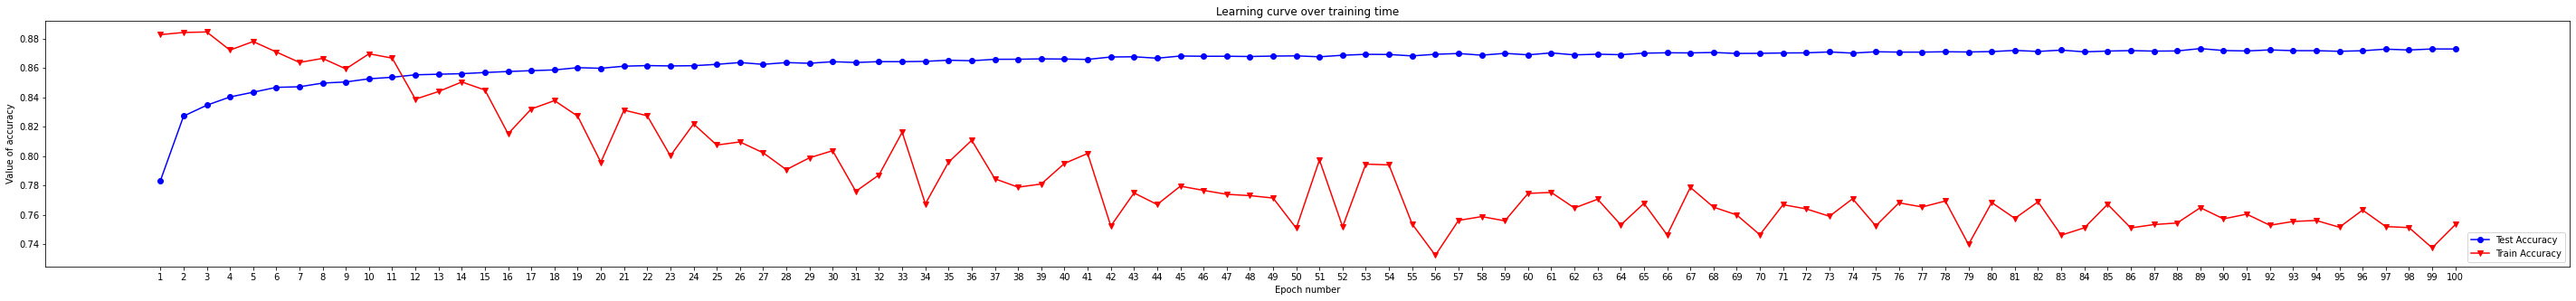

In [12]:
optimal_epoch_search(model, train_data, test_data, train_target, test_target)

In [13]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Iteration  1
82331/82331 [==============================] - 2s 27us/sample - loss: 0.6285 - acc: 0.7847
81172/81172 - 1s - loss: 0.5350 - acc: 0.8587
Iteration  2
82331/82331 [==============================] - 2s 27us/sample - loss: 0.4951 - acc: 0.8252
81172/81172 - 1s - loss: 0.4254 - acc: 0.8836
Iteration  3
82331/82331 [==============================] - 2s 27us/sample - loss: 0.4608 - acc: 0.8370
81172/81172 - 1s - loss: 0.4717 - acc: 0.8831
Iteration  4
82331/82331 [==============================] - 2s 27us/sample - loss: 0.4440 - acc: 0.8411
81172/81172 - 1s - loss: 0.5029 - acc: 0.8829
Iteration  5
82331/82331 [==============================] - 2s 27us/sample - loss: 0.4318 - acc: 0.8435
81172/81172 - 1s - loss: 0.4984 - acc: 0.8845
Iteration  6
82331/82331 [==============================] - 2s 26us/sample - loss: 0.4225 - acc: 0.8475
81172/81172 - 1s - loss: 0.4809 - acc: 0.8869
Iteration  7
82331/82331 [==============================] - 2s 27us/sample - loss: 0.4146 - acc: 0.8

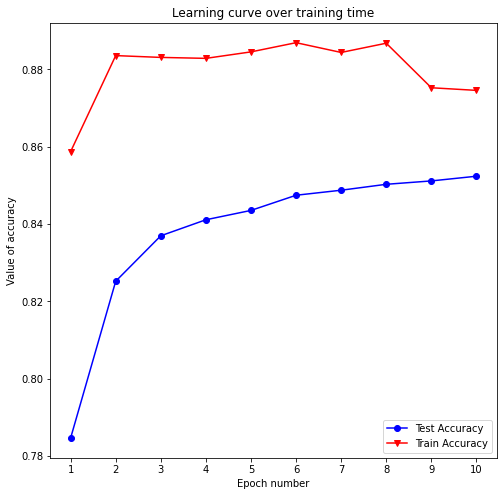

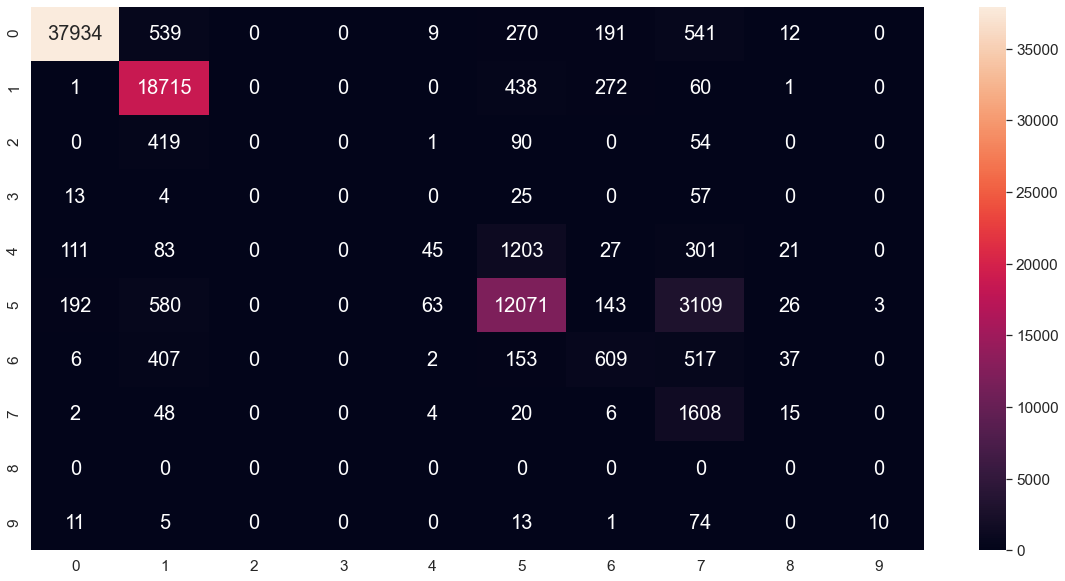

In [14]:
chosen_epoch=10

model_1_train_accuracy, model_1_test_accuracy = gen_learning_curve(model, chosen_epoch, train_data, test_data, train_target, test_target)

gen_learning_curve_image(chosen_epoch, model_1_train_accuracy, model_1_test_accuracy, 8, 8)

model_1_matrix=gen_cf(model, test_data, test_target)

gen_cf_image(model_1_matrix)

## Model 2

* Adam optimizer
* Guassian noise layer
* Dense layer with relu activation function
* Dense layer with softmax activation function

In [15]:
model = keras.Sequential([
    keras.layers.GaussianNoise(0.01),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  

Iteration  1
82331/82331 [==============================] - 3s 31us/sample - loss: 0.6252 - acc: 0.7860
81172/81172 - 1s - loss: 0.5107 - acc: 0.8674
Iteration  2
82331/82331 [==============================] - 3s 31us/sample - loss: 0.4946 - acc: 0.8280
81172/81172 - 1s - loss: 0.4838 - acc: 0.8718
Iteration  3
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4638 - acc: 0.8365
81172/81172 - 1s - loss: 0.4872 - acc: 0.8820
Iteration  4
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4461 - acc: 0.8413
81172/81172 - 1s - loss: 0.5300 - acc: 0.8665
Iteration  5
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4360 - acc: 0.8431
81172/81172 - 1s - loss: 0.5410 - acc: 0.8630
Iteration  6
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4256 - acc: 0.8465
81172/81172 - 1s - loss: 0.5929 - acc: 0.8594
Iteration  7
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4188 - acc: 0.8

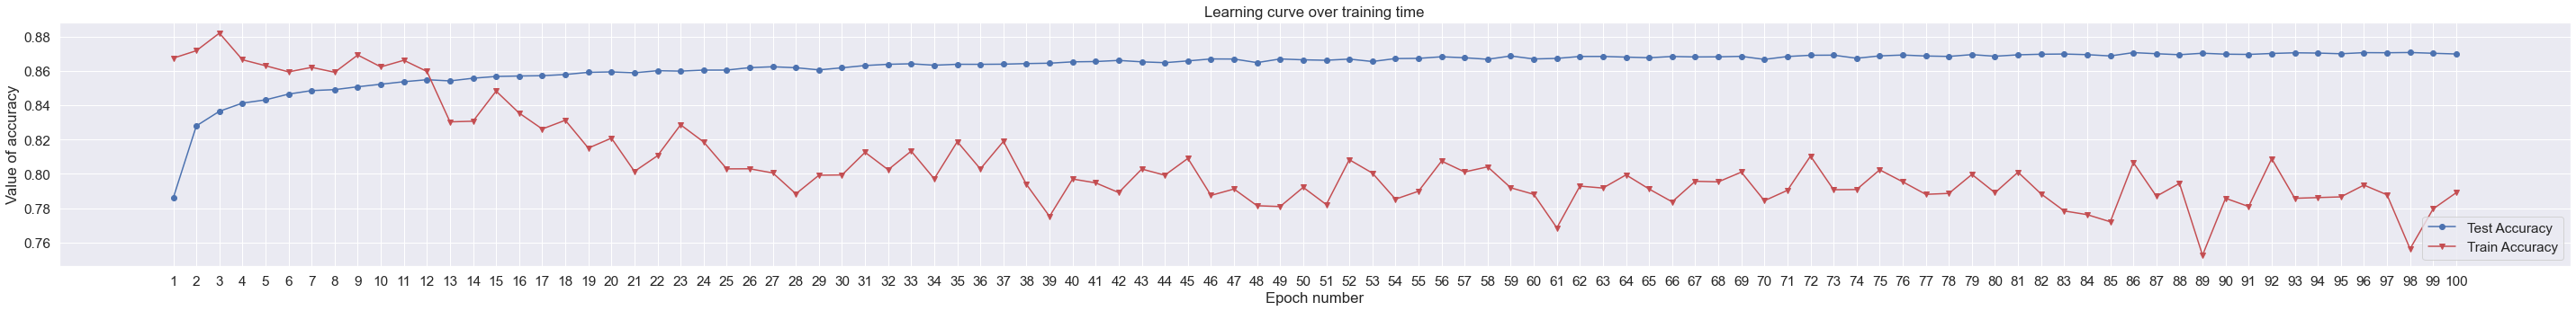

In [16]:
optimal_epoch_search(model, train_data, test_data, train_target, test_target)

In [17]:
model = keras.Sequential([
    keras.layers.GaussianNoise(0.01),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  

Iteration  1
82331/82331 [==============================] - 3s 31us/sample - loss: 0.6265 - acc: 0.7877
81172/81172 - 1s - loss: 0.5335 - acc: 0.8627
Iteration  2
82331/82331 [==============================] - 3s 30us/sample - loss: 0.4959 - acc: 0.8277
81172/81172 - 1s - loss: 0.5640 - acc: 0.8481
Iteration  3
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4633 - acc: 0.8357
81172/81172 - 1s - loss: 0.5355 - acc: 0.8601
Iteration  4
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4461 - acc: 0.8407
81172/81172 - 1s - loss: 0.5223 - acc: 0.8646
Iteration  5
82331/82331 [==============================] - 3s 30us/sample - loss: 0.4344 - acc: 0.8432
81172/81172 - 1s - loss: 0.6252 - acc: 0.8507
Iteration  6
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4250 - acc: 0.8456
81172/81172 - 1s - loss: 0.6463 - acc: 0.8515
Iteration  7
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4182 - acc: 0.8

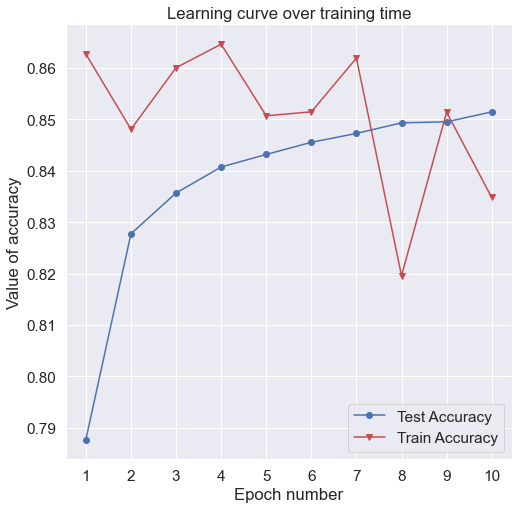

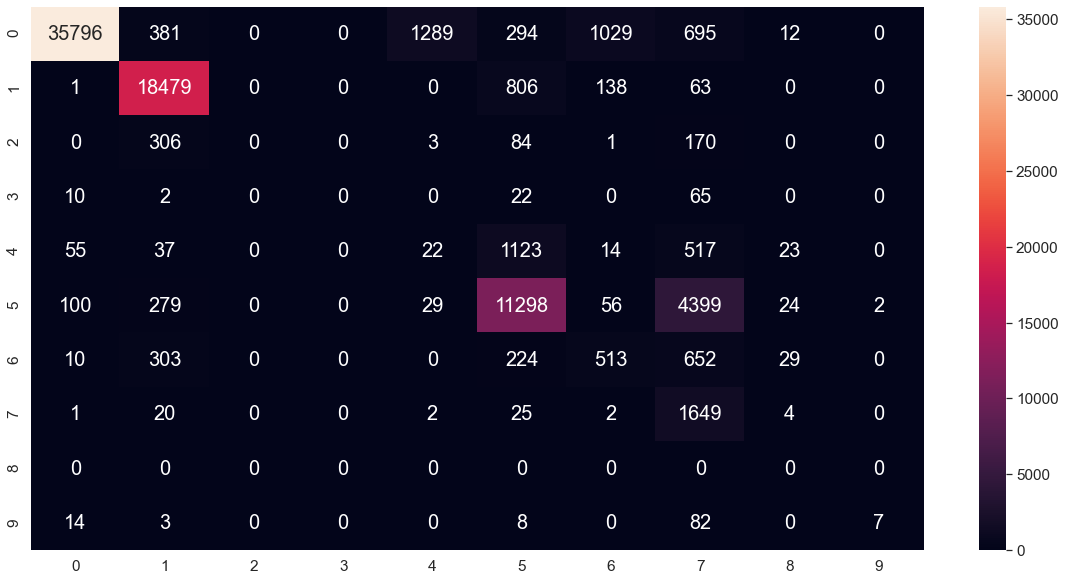

In [18]:
chosen_epoch=10

model_2_train_accuracy, model_2_test_accuracy = gen_learning_curve(model, chosen_epoch, train_data, test_data, train_target, test_target)

gen_learning_curve_image(chosen_epoch, model_2_train_accuracy, model_2_test_accuracy, 8, 8)

model_2_matrix=gen_cf(model, test_data, test_target)

gen_cf_image(model_2_matrix)

## Model 3

* Nadam optimizer
* Dense layer with relu activation function
* Dense layer with softmax activation function

In [19]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Iteration  1
82331/82331 [==============================] - 3s 31us/sample - loss: 0.6275 - acc: 0.7869
81172/81172 - 1s - loss: 0.4967 - acc: 0.8622
Iteration  2
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4893 - acc: 0.8301
81172/81172 - 1s - loss: 0.5075 - acc: 0.8720
Iteration  3
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4573 - acc: 0.8378
81172/81172 - 1s - loss: 0.5485 - acc: 0.8705
Iteration  4
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4413 - acc: 0.8426
81172/81172 - 1s - loss: 0.5513 - acc: 0.8672
Iteration  5
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4293 - acc: 0.8452
81172/81172 - 1s - loss: 0.5639 - acc: 0.8682
Iteration  6
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4213 - acc: 0.8472
81172/81172 - 1s - loss: 0.5968 - acc: 0.8678
Iteration  7
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4135 - acc: 0.8

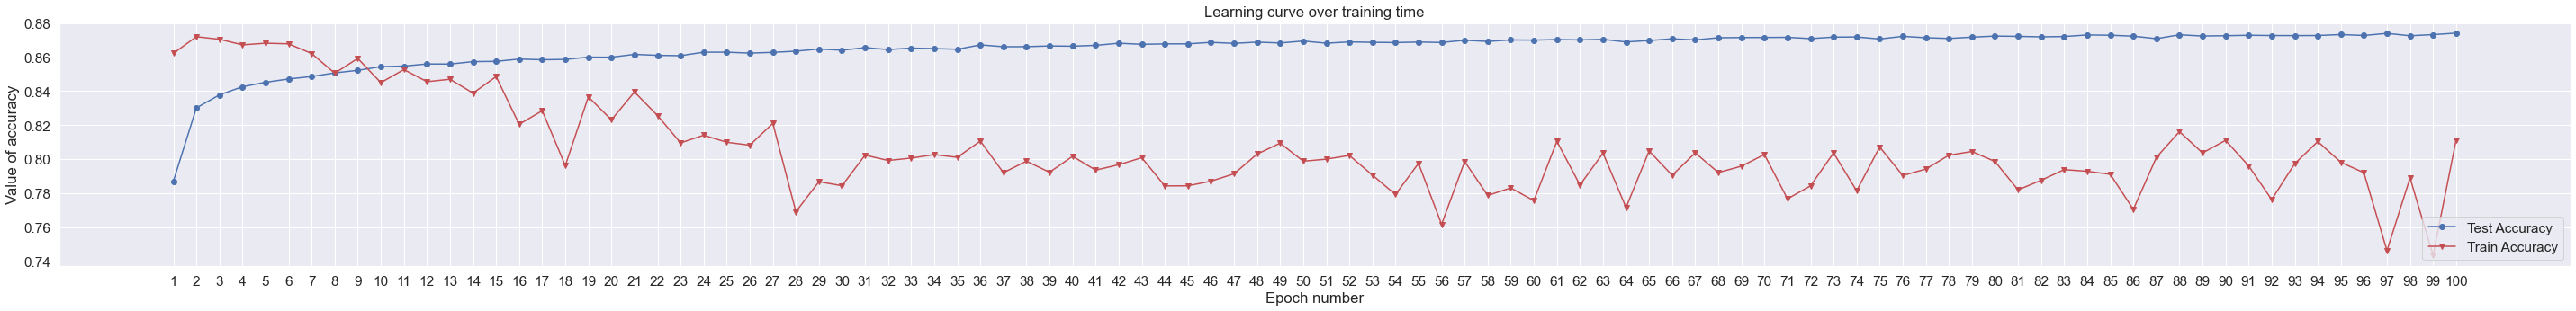

In [20]:
optimal_epoch_search(model, train_data, test_data, train_target, test_target)

In [21]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Iteration  1
82331/82331 [==============================] - 2s 30us/sample - loss: 0.6293 - acc: 0.7869
81172/81172 - 1s - loss: 0.5531 - acc: 0.8624
Iteration  2
82331/82331 [==============================] - 2s 29us/sample - loss: 0.4957 - acc: 0.8281
81172/81172 - 1s - loss: 0.5670 - acc: 0.8652
Iteration  3
82331/82331 [==============================] - 2s 29us/sample - loss: 0.4622 - acc: 0.8371
81172/81172 - 1s - loss: 0.5477 - acc: 0.8699
Iteration  4
82331/82331 [==============================] - 2s 29us/sample - loss: 0.4444 - acc: 0.8413
81172/81172 - 1s - loss: 0.5377 - acc: 0.8686
Iteration  5
82331/82331 [==============================] - 2s 29us/sample - loss: 0.4330 - acc: 0.8438
81172/81172 - 1s - loss: 0.6159 - acc: 0.8708
Iteration  6
82331/82331 [==============================] - 2s 28us/sample - loss: 0.4236 - acc: 0.8471
81172/81172 - 1s - loss: 0.6279 - acc: 0.8665
Iteration  7
82331/82331 [==============================] - 2s 28us/sample - loss: 0.4170 - acc: 0.8

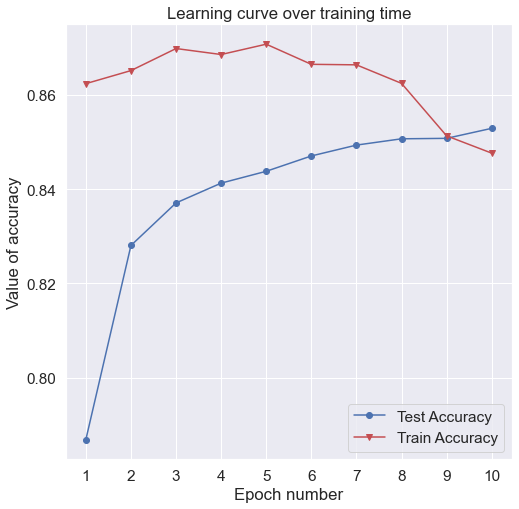

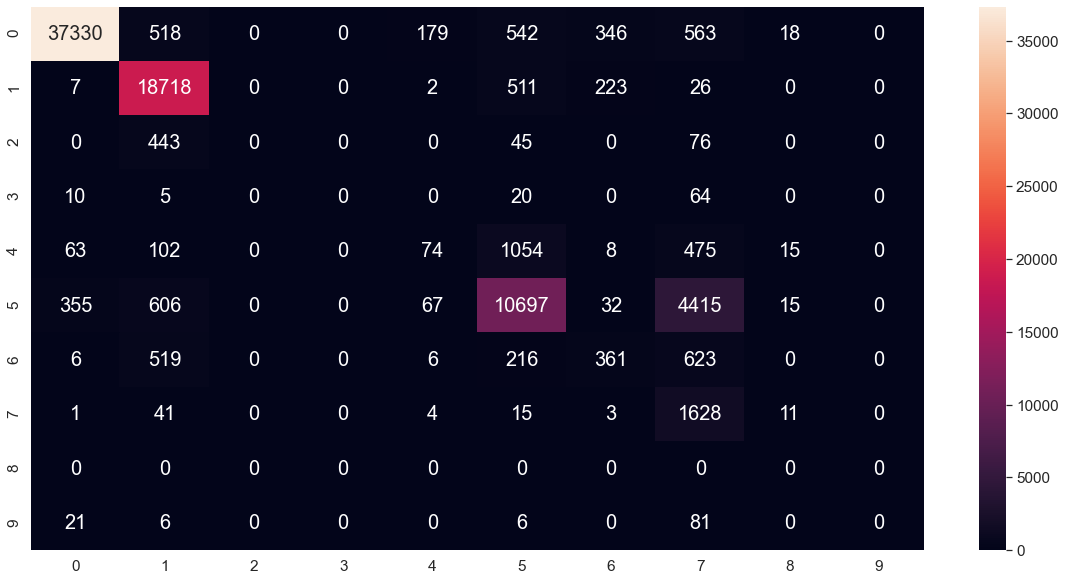

In [22]:
chosen_epoch= 10

model_3_train_accuracy, model_3_test_accuracy = gen_learning_curve(model, chosen_epoch, train_data, test_data, train_target, test_target)

gen_learning_curve_image(chosen_epoch, model_3_train_accuracy, model_3_test_accuracy, 8, 8)

model_3_matrix=gen_cf(model, test_data, test_target)

gen_cf_image(model_3_matrix)

## Model 4

* Nadam optimizer
* Guassian noise layer
* Dense layer with relu activation function
* Dense layer with softmax activation function

In [23]:
model = keras.Sequential([
    keras.layers.GaussianNoise(0.01),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  

Iteration  1
82331/82331 [==============================] - 3s 32us/sample - loss: 0.6223 - acc: 0.7888
81172/81172 - 1s - loss: 0.4517 - acc: 0.8776
Iteration  2
82331/82331 [==============================] - 3s 31us/sample - loss: 0.4919 - acc: 0.8304
81172/81172 - 1s - loss: 0.4573 - acc: 0.8773
Iteration  3
80800/82331 [============================>.] - ETA: 0s - loss: 0.4595 - acc: 0.83882331/82331 [==============================] - 3s 31us/sample - loss: 0.4596 - acc: 0.8381
81172/81172 - 1s - loss: 0.4552 - acc: 0.8855
Iteration  4
82331/82331 [==============================] - 3s 31us/sample - loss: 0.4438 - acc: 0.8410
81172/81172 - 1s - loss: 0.4967 - acc: 0.8838
Iteration  5
82331/82331 [==============================] - 3s 31us/sample - loss: 0.4338 - acc: 0.8445
81172/81172 - 1s - loss: 0.5248 - acc: 0.8805
Iteration  6
82331/82331 [==============================] - 3s 30us/sample - loss: 0.4245 - acc: 0.8468
81172/81172 - 1s - loss: 0.5430 - acc: 0.8808
Iteration  7
82331

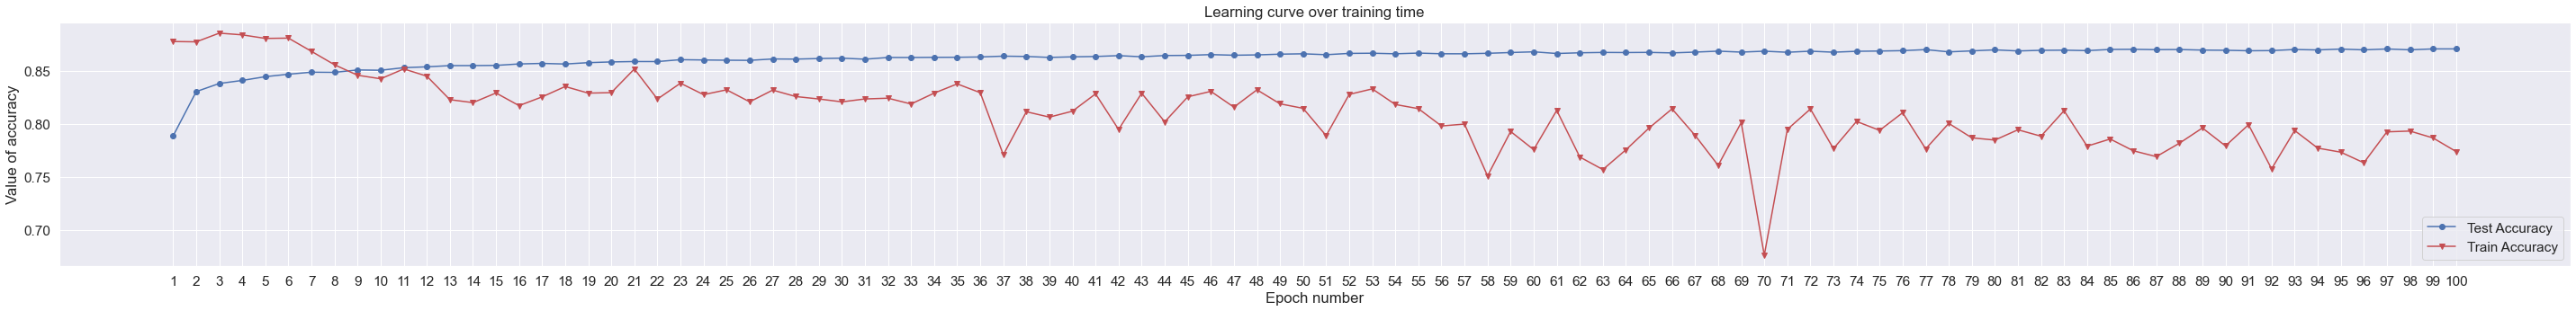

In [24]:
optimal_epoch_search(model, train_data, test_data, train_target, test_target)

In [25]:
model = keras.Sequential([
    keras.layers.GaussianNoise(0.01),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  

Iteration  1
82331/82331 [==============================] - 3s 35us/sample - loss: 0.6216 - acc: 0.7879
81172/81172 - 1s - loss: 0.4775 - acc: 0.8766
Iteration  2
82331/82331 [==============================] - 3s 34us/sample - loss: 0.4913 - acc: 0.8288
81172/81172 - 1s - loss: 0.5082 - acc: 0.8640
Iteration  3
82331/82331 [==============================] - 3s 33us/sample - loss: 0.4605 - acc: 0.8374
81172/81172 - 1s - loss: 0.5090 - acc: 0.8667
Iteration  4
82331/82331 [==============================] - 3s 34us/sample - loss: 0.4440 - acc: 0.8419
81172/81172 - 1s - loss: 0.5266 - acc: 0.8661
Iteration  5
82331/82331 [==============================] - 3s 34us/sample - loss: 0.4308 - acc: 0.8446
81172/81172 - 1s - loss: 0.6751 - acc: 0.8502
Iteration  6
82331/82331 [==============================] - 3s 33us/sample - loss: 0.4226 - acc: 0.8473
81172/81172 - 1s - loss: 0.6463 - acc: 0.8545
Iteration  7
82331/82331 [==============================] - 3s 34us/sample - loss: 0.4171 - acc: 0.8

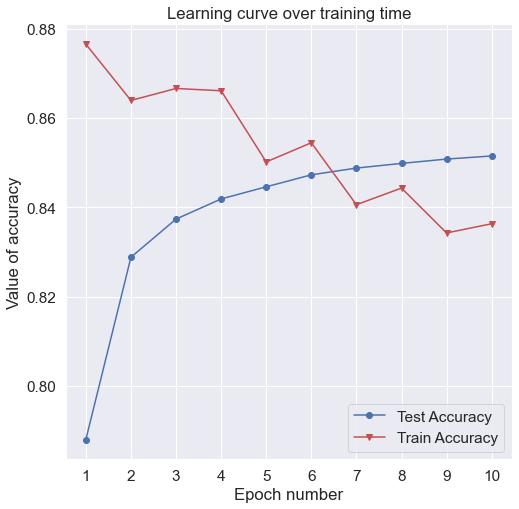

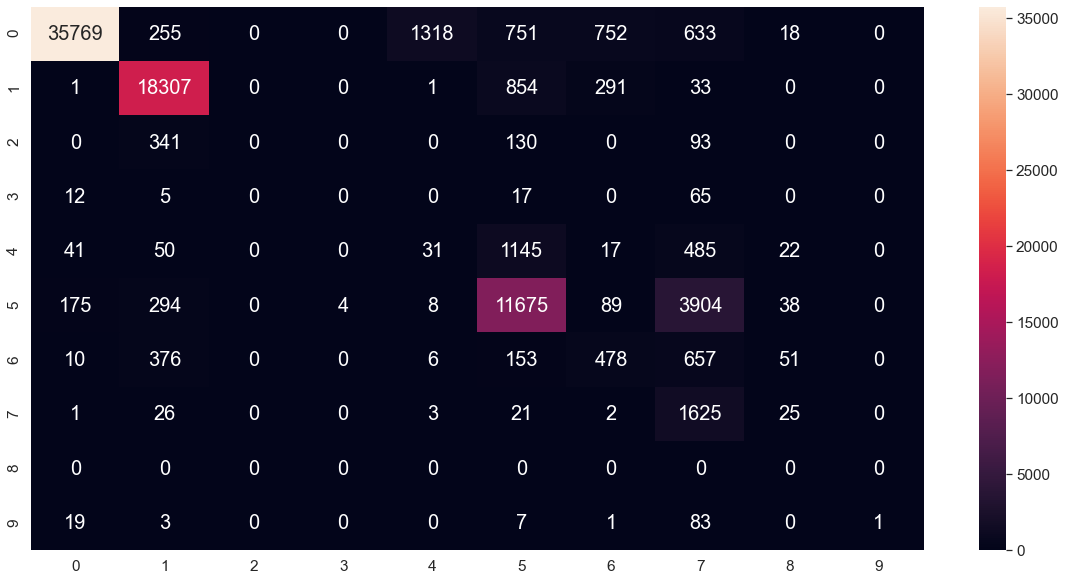

In [26]:
chosen_epoch= 10

model_4_train_accuracy, model_4_test_accuracy = gen_learning_curve(model, chosen_epoch, train_data, test_data, train_target, test_target)

gen_learning_curve_image(chosen_epoch, model_4_train_accuracy, model_4_test_accuracy, 8, 8)

model_4_matrix=gen_cf(model, test_data, test_target)

gen_cf_image(model_4_matrix)

Reference for making the confusion matrix image

https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn

https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers